CLIMATE TREND RESULTS (MANIPAL)

Temperature Trend:
  0.0480 °C per year
  0.4800 °C per decade

Precipitation Trend:
  12.51 mm per year
  125.05 mm per decade



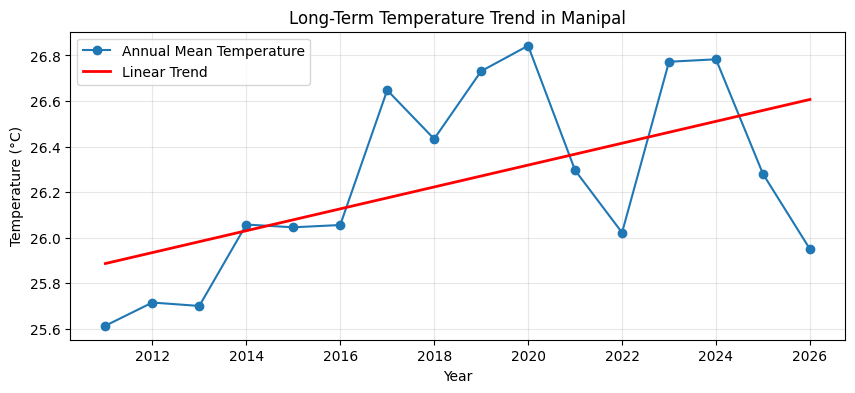

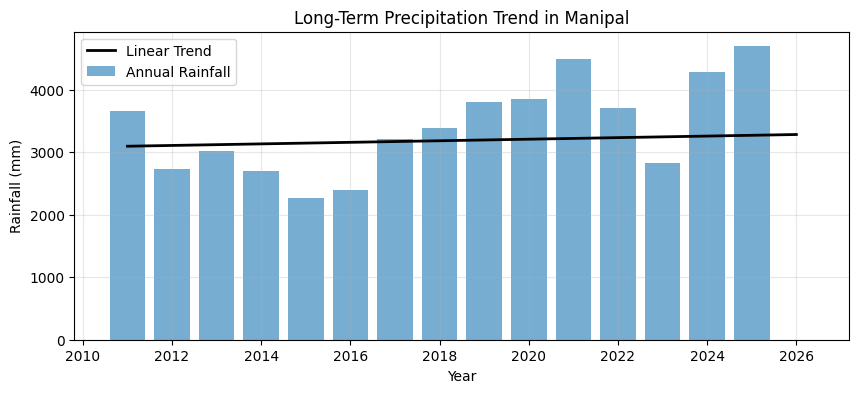

In [6]:
# ===============================
# CLIMATIC ANALYSIS OF MANIPAL
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# let sLOAD DATA
mpl = "/content/manipal.csv"

df = pd.read_csv(mpl, skiprows=3)

# Rename required columns only
df = df.rename(columns={
    'time': 'date',
    'temperature_2m_mean (°C)': 'temp',
    'precipitation_sum (mm)': 'precip'
})

# Parse dates and clean em
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'temp', 'precip'])
df = df.sort_values('date').reset_index(drop=True)

# ANNUAL AGGREGATION
df['year'] = df['date'].dt.year

annual = df.groupby('year').agg(
    mean_temp=('temp', 'mean'),
    total_rain=('precip', 'sum')
).reset_index()

# LINEAR TREND MODELS
X = annual[['year']].values

temp_model = LinearRegression().fit(X, annual['mean_temp'])
rain_model = LinearRegression().fit(X, annual['total_rain'])

temp_slope = temp_model.coef_[0]    # °C per year
rain_slope = rain_model.coef_[0]    # mm per year

#
print("CLIMATE TREND RESULTS (MANIPAL)\n")

print("Temperature Trend:")
print(f"  {temp_slope:.4f} °C per year")
print(f"  {temp_slope * 10:.4f} °C per decade\n")

print("Precipitation Trend:")
print(f"  {rain_slope:.2f} mm per year")
print(f"  {rain_slope * 10:.2f} mm per decade\n")

# TREND LINES FOR PLOTTING
annual['temp_trend'] = temp_model.predict(X)
annual['rain_trend'] = rain_model.predict(X)

# -pLOTS ----

# Temperature trend
plt.figure(figsize=(10,4))
plt.plot(annual['year'], annual['mean_temp'], marker='o', label='Annual Mean Temperature')
plt.plot(annual['year'], annual['temp_trend'], color='red', linewidth=2, label='Linear Trend')
plt.title('Long-Term Temperature Trend in Manipal')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Precipitation trend
plt.figure(figsize=(10,4))
plt.bar(annual['year'], annual['total_rain'], alpha=0.6, label='Annual Rainfall')
plt.plot(annual['year'], annual['rain_trend'], color='black', linewidth=2, label='Linear Trend')
plt.title('Long-Term Precipitation Trend in Manipal')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
